# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
api_format = "json"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | progreso
Processing Record 3 of Set 1 | klyuchi
Processing Record 4 of Set 1 | zabalj
Processing Record 5 of Set 1 | akureyri
Processing Record 6 of Set 1 | daru
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | vilyuysk
Processing Record 9 of Set 1 | choibalsan
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | zhongxing
Processing Record 12 of Set 1 | korla
Processing Record 13 of Set 1 | pathein
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | altai
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | kapa'a
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | qiancheng
Processing Record 22 of Set 1 | edinburgh of the seven seas
Processing Record 

Processing Record 43 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 44 of Set 4 | alaghsas
Processing Record 45 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 46 of Set 4 | san jose del guaviare
Processing Record 47 of Set 4 | san luis de la loma
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | el calafate
Processing Record 0 of Set 5 | popondetta
Processing Record 1 of Set 5 | polyarnyy
Processing Record 2 of Set 5 | arno
Processing Record 3 of Set 5 | selfoss
Processing Record 4 of Set 5 | ta`u
Processing Record 5 of Set 5 | juneau
Processing Record 6 of Set 5 | tazacorte
Processing Record 7 of Set 5 | sakaiminato
Processing Record 8 of Set 5 | lejanias
Processing Record 9 of Set 5 | kerugoya
Processing Record 10 of Set 5 | khuzdar
Processing Record 11 of Set 5 | constitucion
Processing Record 12 of Set 5 | los alamos
Processing Record 13 of Set 5 | quellon
Processing Record 14 of Set 5 | bloomsburg
Processing Reco

Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | lichinga
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | ostersund
Processing Record 38 of Set 8 | talnakh
Processing Record 39 of Set 8 | pyt-yakh
Processing Record 40 of Set 8 | bamboo flat
Processing Record 41 of Set 8 | urengoy
Processing Record 42 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 43 of Set 8 | seven pagodas
Processing Record 44 of Set 8 | mercedes
Processing Record 45 of Set 8 | elk city
Processing Record 46 of Set 8 | yagry
City not found. Skipping...
Processing Record 47 of Set 8 | flying fish cove
Processing Record 48 of Set 8 | palenque
Processing Record 49 of Set 8 | placido de castro
Processing Record 0 of Set 9 | cowra
Processing Record 1 of Set 9 | new norfolk
Processing Record 2 of Set 9 | chayan
Processing Record 3 of Set 9 | colonia
Processing Record 4 of Set 9 | ruiz
Processing Record 5 of Set 9 | mariental
Processing Re

Processing Record 23 of Set 12 | say
Processing Record 24 of Set 12 | turbat
Processing Record 25 of Set 12 | remolino
Processing Record 26 of Set 12 | kingscliff
Processing Record 27 of Set 12 | son la
Processing Record 28 of Set 12 | ugoofaaru
Processing Record 29 of Set 12 | wuwei
Processing Record 30 of Set 12 | mota del cuervo
Processing Record 31 of Set 12 | patong
Processing Record 32 of Set 12 | kursenai
Processing Record 33 of Set 12 | punta cardon
Processing Record 34 of Set 12 | ban nong wua so
Processing Record 35 of Set 12 | sandnessjoen
Processing Record 36 of Set 12 | dryden
Processing Record 37 of Set 12 | ingeniero jacobacci
Processing Record 38 of Set 12 | campbellton
Processing Record 39 of Set 12 | isle of lewis
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,35.35,63,66,26.62,TF,1698634527
1,progreso,21.2833,-89.6667,78.89,78,0,13.58,MX,1698634529
2,klyuchi,52.2667,79.1667,33.01,98,100,10.29,RU,1698634452
3,zabalj,45.3722,20.0639,57.88,54,10,7.74,RS,1698634532
4,akureyri,65.6835,-18.0878,17.53,93,0,1.14,IS,1698634533


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,35.35,63,66,26.62,TF,1698634527
1,progreso,21.2833,-89.6667,78.89,78,0,13.58,MX,1698634529
2,klyuchi,52.2667,79.1667,33.01,98,100,10.29,RU,1698634452
3,zabalj,45.3722,20.0639,57.88,54,10,7.74,RS,1698634532
4,akureyri,65.6835,-18.0878,17.53,93,0,1.14,IS,1698634533


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

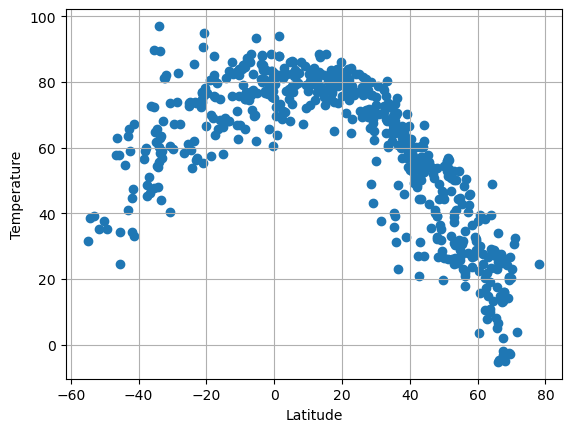

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

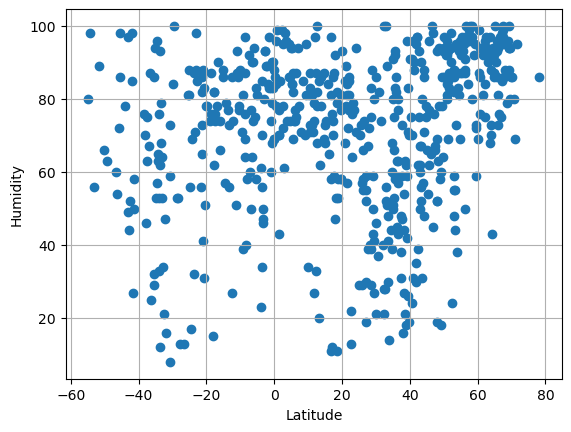

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

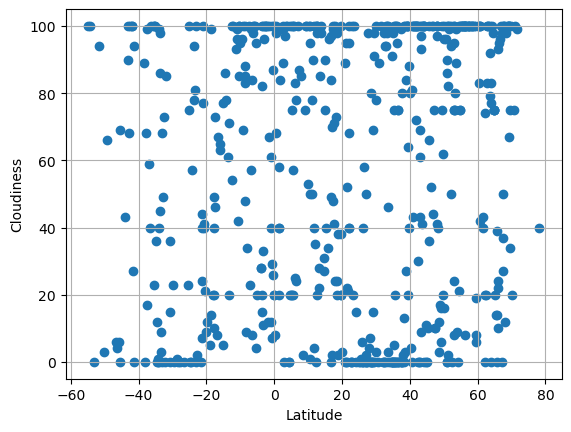

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

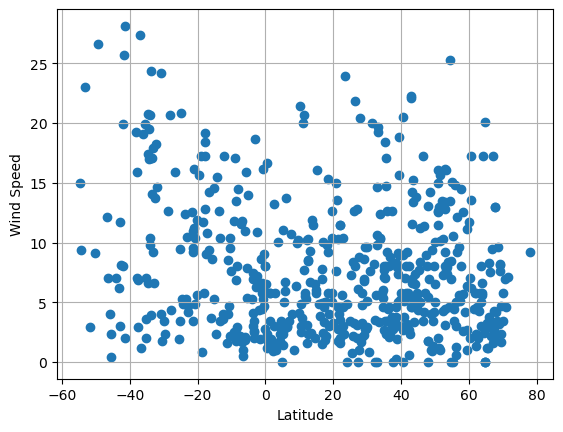

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
={
    
}
northern_hemi_df = pd.DataFrame()

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
={
    
}
southern_hemi_df = pd.DataFrame()

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE